In [1]:
import os
import matplotlib.pyplot as plt
import json
from glob import glob
import numpy as np
from pathlib import Path
from tqdm import tqdm
plt.style.use('ggplot')

In [2]:
temps = [1, 0.1, 0.01, 0.001]

def acc_lp_per_temp(exp_name, selected_priors=["gaussian"]):
    print(exp_name)
    run_files = glob(f"/data2/users/yn621/cold-posterior-cnn/results/{exp_name}/*/eval/1/run.json")

    acc = {str(temp) : [] for temp in temps}
    nll = {str(temp) : [] for temp in temps}

    for run_file in tqdm(run_files):

        log_dir = Path(os.path.dirname(run_file))

        with open(log_dir/"config.json", "r") as f:
            config = json.load(f)
            
        with open(run_file, "r") as f:
            perf = json.load(f)
            perf = perf["result"]

        if config["weight_prior"] not in selected_priors:
            continue
        
        acc[str(config["temperature"])].append(perf["acc_ensemble"])
        nll[str(config["temperature"])].append(-perf["lp_ensemble"])

    mean_acc, std_acc = [], []
    mean_nll, std_nll = [], []
    for temp in temps:
        mean_acc.append(np.mean(acc[str(temp)]))
        std_acc.append(np.std(acc[str(temp)]))
        mean_nll.append(np.mean(nll[str(temp)]))
        std_nll.append(np.std(nll[str(temp)]))

    return mean_acc, std_acc, mean_nll, std_nll

exp_cifar10_depth20_width3_lr0.01_warmup45_cycles60_scale0


  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 124.93it/s]


exp_cifar10_depth20_width3_lr0.6_warmup45_cycles60_scale1


100%|██████████| 12/12 [00:00<00:00, 2288.32it/s]


exp_cifar10_depth20_width3_lr0.3_warmup45_cycles60_scale2


100%|██████████| 12/12 [00:00<00:00, 2313.99it/s]


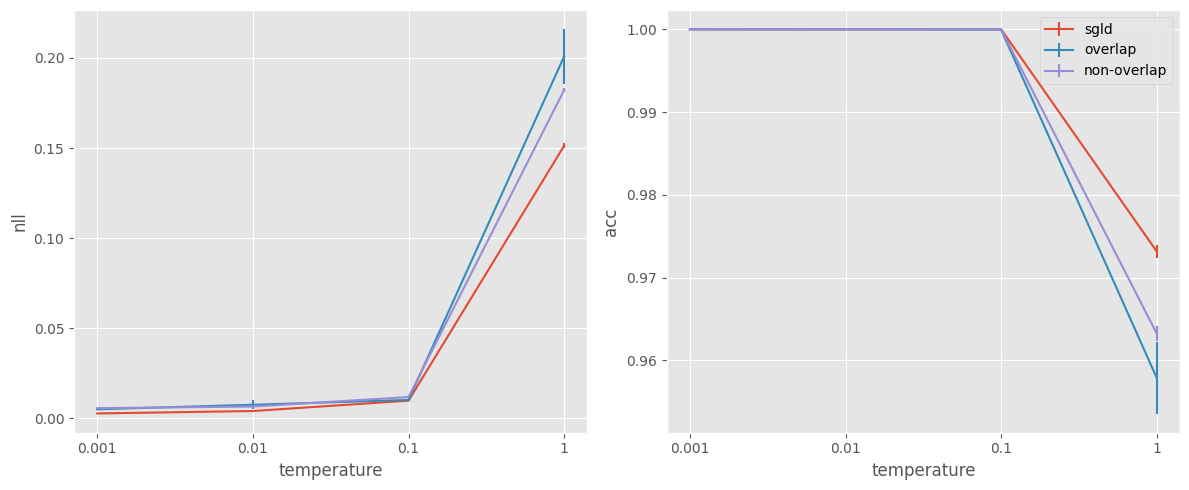

In [3]:
labels = ["sgld", "overlap", "non-overlap"]
names = [
    "exp_cifar10_depth20_width3_lr0.01_warmup45_cycles60_scale0",
    "exp_cifar10_depth20_width3_lr0.6_warmup45_cycles60_scale1",
    "exp_cifar10_depth20_width3_lr0.3_warmup45_cycles60_scale2",
]
x = [0, -1, -2, -3]
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
for exp_name, label in zip(names, labels):
    mean_acc, std_acc, mean_nll, std_nll = acc_lp_per_temp(exp_name)
    axis[0].errorbar(x, mean_nll, std_nll, label=label)
    axis[1].errorbar(x, mean_acc, std_acc, label=label)

axis[0].set_xticks(x, ["1", "0.1", "0.01", "0.001"])
axis[0].set_xlabel("temperature")
axis[0].set_ylabel("nll")
axis[1].legend()
axis[1].set_xticks(x, ["1", "0.1", "0.01", "0.001"])
axis[1].set_xlabel("temperature")
axis[1].set_ylabel("acc")
axis[1].legend()
plt.tight_layout()
plt.savefig("../figures/exp_cifar10_depth20_width3_train_performance.pdf")